In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import qutip as qt
import sys
sys.path.append('../SimulationCode/')
from TelescopeSimulation import *
from fiber_network import FiberNetwork
from SiVnodes import SiV
from SiVgates import *
from Plots import *

In [2]:
# colors for plots to stay within paper pallete 
c1 = '#F15F57'
c2 = '#F6851F'
c3 = '#FDB913'
c4 = '#743062'
c5 = '#C87EB5'
c6 = '#4CC0B3'
c7 = '#1C9AAA'

In [3]:
# Create SiVs, all numbers in MHz:

#Server A, G12
siv_a = SiV(kappa_in= (74.9 - 54.5)*(10**3), kappa_w= (54.5)*(10**3), g=5.6*(10**3), wCav = (0)*(10**3), 
             wSiv = -(479.8 -639.6)*(10**3), dwEl = 0.5*(10**3)) # G12
#Server B, B16
siv_b = SiV(kappa_in= (43.5 - 26.0)*(10**3), kappa_w= (26.0)*(10**3), g=8.5*(10**3), wCav = (0)*(10**3), 
             wSiv = -(804.9 -657.6)*(10**3), dwEl = -0.5*(10**3)) # B16

## Setup Two-Node experiments in B16-G12

In [4]:
# Create Networks:
g12_b16_network = FiberNetwork(siv_a, siv_b) # this device is now in B16 fridge

# Create Simulation:
sim2 = TelescopeSimulation(g12_b16_network)

In [5]:
# Setup efficiencies

g12_b16_network.fibercoupling_eff = 0.6
g12_b16_network.tdi_eff = 0.35*0.3
g12_b16_network.snspd_eff = 0.9
g12_b16_network.detection_eff
g12_b16_network.detection_eff_reset()
g12_b16_network.link_efficiency = (g12_b16_network.fibercoupling_eff**2)*0.05*0.64

print('Detection efficientvy is = ', g12_b16_network.detection_eff)
print('Link efficientvy is = ', g12_b16_network.link_efficiency)

Detection efficientvy is =  0.0567
Link efficientvy is =  0.011519999999999999


In [6]:
# gate fidelities
b16_mwfid = 0.99
g12_mwfid = 0.98

#### Move the SiV to the desired contrast point

In [7]:
b16_contrast = 25 # range 18 - 30
g12_contrast = 20 # range 12 - 20

siv_b.set_contrast(b16_contrast)
actual_contrast_b16 = siv_b.get_best_contrast()
print("B16 contrast is set to = ", actual_contrast_b16)

siv_a.set_contrast(g12_contrast)
actual_contrast_g12 = siv_a.get_best_contrast()
print("G12 contrast is set to = ", actual_contrast_g12)

new contrast 27.979731852612364
B16 contrast is set to =  27.979731852612364
new contrast 22.984605715760683
G12 contrast is set to =  22.984605715760683


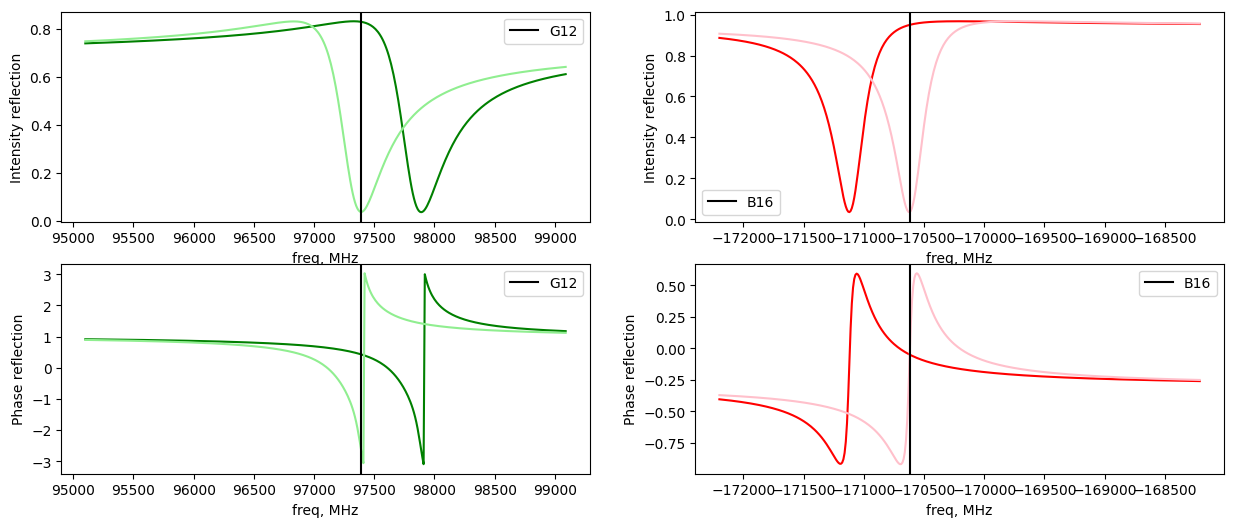

In [8]:
## Plot 
# generate plots of reflectivity

wl_A = siv_a.get_plotaxis()
wl_B = siv_b.get_plotaxis()

wl_read_optimum_A = siv_a.freq_optimum()
wl_read_optimum_B = siv_b.freq_optimum()

figure, ax = plt.subplots(2, 2, figsize=(15, 6))

ax[0,0].plot(wl_A, np.abs(siv_a.cav_refl(wl_A)['refl_refl'])**2, color = 'green')
ax[0,0].plot(wl_A, np.abs(siv_a.cav_refl(wl_A)['nonrefl_refl'])**2,color = 'lightgreen')
ax[0,0].set_xlabel('freq, MHz')
ax[0,0].set_ylabel('Intensity reflection')
ax[0,0].axvline(x = wl_read_optimum_A, color = 'black', label = 'G12')
ax[0,0].legend()

ax[0,1].plot(wl_B, np.abs(siv_b.cav_refl(wl_B)['refl_refl'])**2, color = 'red')
ax[0,1].plot(wl_B, np.abs(siv_b.cav_refl(wl_B)['nonrefl_refl'])**2, color = 'pink')
ax[0,1].set_xlabel('freq, MHz')
ax[0,1].set_ylabel('Intensity reflection')
ax[0,1].axvline(x = wl_read_optimum_B, color = 'black', label = 'B16')
ax[0,1].legend()

ax[1,0].plot(wl_A, np.angle(siv_a.cav_refl(wl_A)['refl_refl']), color = 'green')
ax[1,0].plot(wl_A, np.angle(siv_a.cav_refl(wl_A)['nonrefl_refl']),color = 'lightgreen')
ax[1,0].set_xlabel('freq, MHz')
ax[1,0].set_ylabel('Phase reflection')
ax[1,0].axvline(x = wl_read_optimum_A, color = 'black', label = 'G12')
ax[1,0].legend()

ax[1,1].plot(wl_B, np.angle(siv_b.cav_refl(wl_B)['refl_refl']), color = 'red')
ax[1,1].plot(wl_B, np.angle(siv_b.cav_refl(wl_B)['nonrefl_refl']), color = 'pink')
ax[1,1].set_xlabel('freq, MHz')
ax[1,1].set_ylabel('Phase reflection')
ax[1,1].axvline(x = wl_read_optimum_B, color = 'black', label = 'B16')
ax[1,1].legend()

plt.show()

## B16-G12 serial entanglement

##### Single run

In [9]:
imperfections ={'contrast_noise': 0, #(0 not noisy or 1 noisy)
                'contrast': 'real', #'real'
                'tdinoise': 0.1, #np.pi/25, #'real'
                'mw': 'real', # or perfect
                'mw_noise': 1, #(0 is stable or 1 noisy/underotates overroates every experimental shot)
                'mw_fid_num': [b16_mwfid, b16_mwfid] # default fidelities
               }
mu = 0.1
# e1e2
ee_initial = qt.tensor(rho_ideal_Xp, rho_ideal_Xp)

In [ ]:
rho = sim2.serial_entanglement_ee(ee_initial, imperfections, mu)
print(rho)
rho = rho[0]


(Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.55221752+1.22079025e-17j -0.07645169-6.84158818e-03j
  -0.0863256 -2.76181266e-02j  0.45356335-3.96600684e-02j]
 [-0.07645169+6.84158818e-03j  0.01289942+1.93265996e-18j
   0.01316497+2.78005811e-03j -0.06371009+1.04947242e-02j]
 [-0.0863256 +2.76181266e-02j  0.01316497-2.78005811e-03j
   0.0188887 +2.90005753e-18j -0.06197114+3.15266644e-02j]
 [ 0.45356335+3.96600684e-02j -0.06371009-1.04947242e-02j
  -0.06197114-3.15266644e-02j  0.41599436-4.58150361e-18j]], np.int64(0), 4.9034580827539024e-06, 6.641741171612121e-06, 1.1545199254366023e-05)


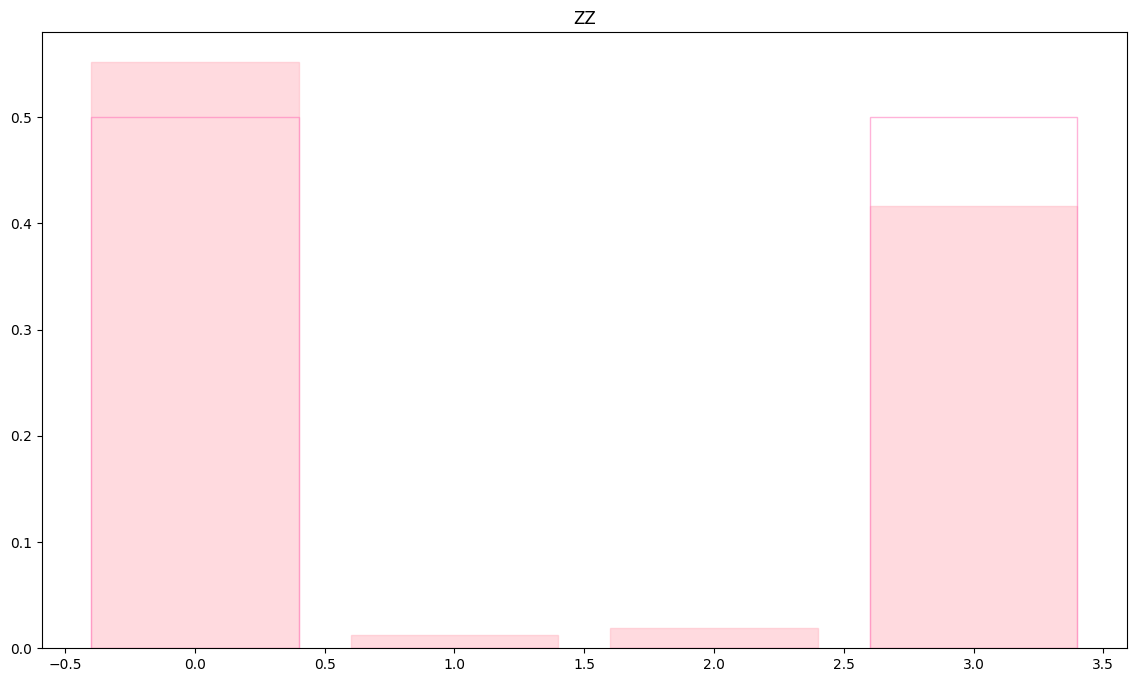

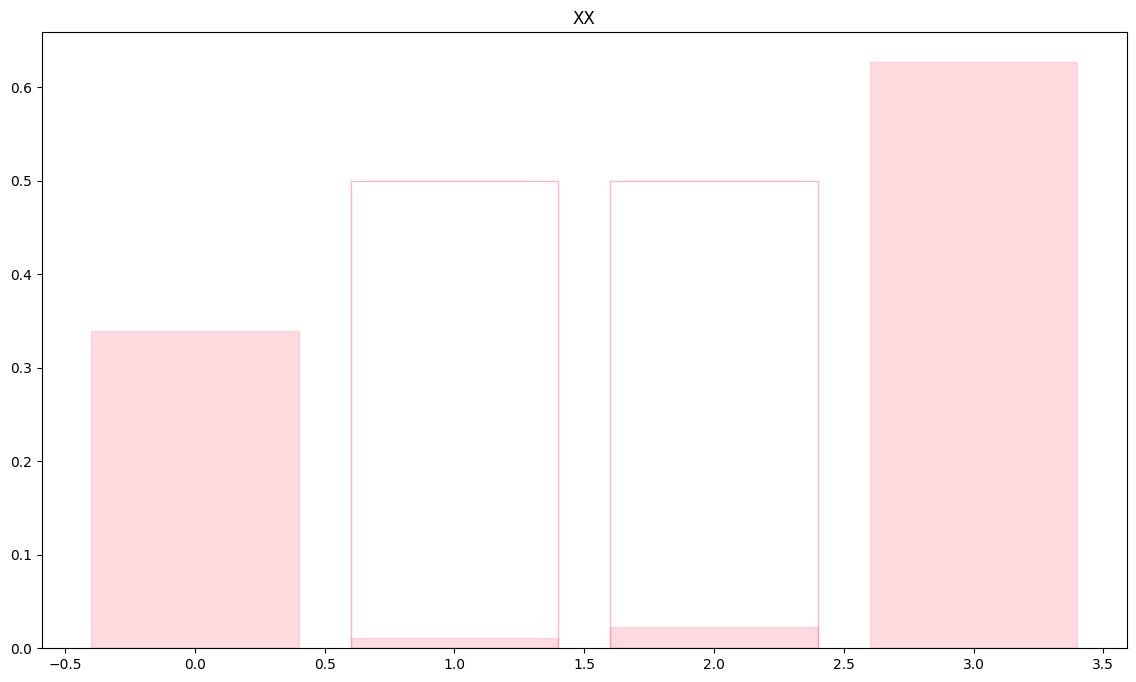

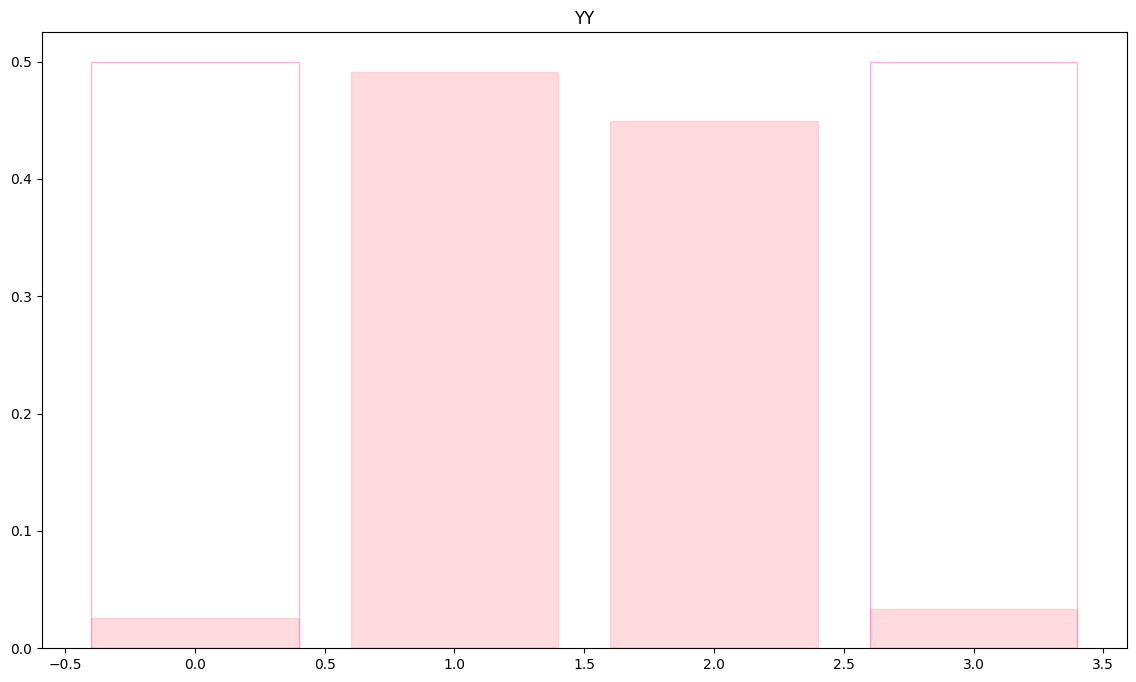

In [15]:
ZZ_tom = elel_bell_state_Ztomography(rho)
XX_tom = elel_bell_state_Xtomography(rho)
YY_tom = elel_bell_state_Ytomography(rho)

bell_state_barplotZZ(ZZ_tom)
bell_state_barplotXX(XX_tom)
bell_state_barplotYY(YY_tom)

#### Run as a fucntion of mu

In [ ]:
n_rounds = 60
mu_list = np.linspace(0.001, 0.7, 6)

rates_apd1_apd2 = np.empty((0, 2), dtype=float)
rho_mu_n_array = np.empty((0, n_rounds, 2, 2), dtype=complex)

# my list
quantum_measurement_list_mu = np.empty((0, n_rounds, 1), dtype=np.float64)
brate_apd_1_list_mu = np.empty((0, n_rounds, 1), dtype=np.float64)
brate_apd_2_list_mu = np.empty((0, n_rounds, 1), dtype=np.float64)
brate_tot_list_mu = np.empty((0, n_rounds, 1), dtype=np.float64)
rho_list_mu = np.empty((0,n_rounds, 4, 4), dtype=complex)

#phi list
for i in range(len(mu_list)):
    mu = mu_list[i]
    print("mu = ", mu)

    # my list
    quantum_measurement_list = np.empty((0, 1), dtype=np.float64)
    brate_apd_1_list = np.empty((0, 1), dtype=np.float64)
    brate_apd_2_list = np.empty((0, 1), dtype=np.float64)
    brate_tot_list = np.empty((0, 1), dtype=np.float64)
    rho_list = np.empty((0, 4, 4), dtype=complex)
    
    for i in range(n_rounds): 
        rho, quantum_measurement, brate_apd_1, brate_apd_2, brate_tot  = sim2.serial_entanglement_ee(ee_initial, imperfections, mu)
        rho_list = np.append(rho_list, [rho.full()], axis = 0)
        quantum_measurement_list = np.append(quantum_measurement_list, quantum_measurement)
        brate_apd_1_list = np.append(brate_apd_1_list, brate_apd_1)
        brate_apd_2_list = np.append(brate_apd_2_list, brate_apd_2)
        brate_tot_list = np.append(brate_tot_list, brate_tot)
        
    
    rho_list_mu = np.append(rho_list_mu, [rho_list], axis = 0)
    quantum_measurement_list_mu = np.append(quantum_measurement_list_mu, quantum_measurement_list)
    brate_apd_1_list_mu = np.append(brate_apd_1_list_mu, brate_apd_1_list)
    brate_apd_2_list_mu = np.append(brate_apd_2_list_mu, brate_apd_2_list)
    brate_tot_list_mu = np.append(brate_tot_list_mu, brate_tot_list)

mu =  0.001
mu =  0.14079999999999998
mu =  0.28059999999999996
mu =  0.42039999999999994
mu =  0.5601999999999999
mu =  0.7


In [154]:
fid_list_0_mu = np.empty((0, 1, n_rounds), dtype=np.float64)
fid_list_1_mu = np.empty((0, 1, n_rounds), dtype=np.float64)
fid_list_0_err_mu = np.empty((0, 1, n_rounds), dtype=np.float64)
fid_list_1_err_mu = np.empty((0, 1, n_rounds), dtype=np.float64)

for i in range(len(mu_list)):
    fid_list_0 = np.empty((0, 1), dtype=np.float64)
    fid_list_1 = np.empty((0, 1), dtype=np.float64)
    
    for j in range(n_rounds):
        if quantum_measurement_list_mu[j + i*n_rounds]==0:
            fid = qt.fidelity(qt.Qobj(rho_list_mu[i,j], dims=[[2, 2], [2, 2]]), qt.ket2dm(bell_states[0]))
            fid_list_0 = np.append(fid_list_0, fid)
            fid_0 = np.mean(fid_list_0, axis = 0)
            fid_0_std = np.std(fid_list_0, axis = 0)

        elif quantum_measurement_list_mu[j + i*n_rounds]==1:
            fid = qt.fidelity(qt.Qobj(rho_list_mu[i,j], dims=[[2, 2], [2, 2]]), qt.ket2dm(bell_states[1]))
            fid_list_1 = np.append(fid_list_1, fid)
            fid_1 = np.mean(fid_list_1, axis = 0)
            fid_1_std = np.std(fid_list_1, axis = 0)

        
    fid_list_0_mu = np.append(fid_list_0_mu, fid_0)
    fid_list_1_mu = np.append(fid_list_1_mu, fid_1)
    fid_list_0_err_mu = np.append(fid_list_0_err_mu, fid_0_std)
    fid_list_1_err_mu = np.append(fid_list_1_err_mu, fid_1_std)


In [ ]:
reshaped_brate_apd_1_lis = brate_apd_1_list_mu.reshape(len(mu_list), n_rounds)
reshaped_brate_apd_2_lis = brate_apd_2_list_mu.reshape(len(mu_list), n_rounds)

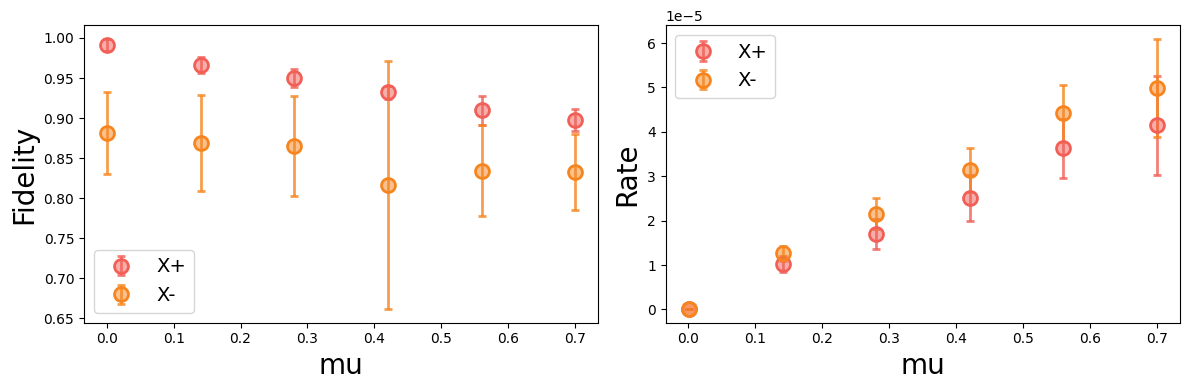

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Sample data
x = mu_list
y_0 = fid_list_0_mu
y_1 = fid_list_1_mu

yerr_0 = fid_list_0_err_mu
yerr_1 = fid_list_1_err_mu


y_r_0 = np.mean(reshaped_brate_apd_1_lis, axis = 1)
y_r_1 = np.mean(reshaped_brate_apd_2_lis, axis = 1)

yerr_r_0 = np.std(reshaped_brate_apd_1_lis, axis = 1)
yerr_r_1 = np.std(reshaped_brate_apd_2_lis, axis = 1)

# Define colors with alpha values
facecolor_cl = colors.to_rgba(c1, alpha=0.5)
edgecolor_cl = colors.to_rgba(c1, alpha=1.0)
errorbar_color_cl = colors.to_rgba(c1, alpha=0.8)

facecolor_s = colors.to_rgba(c2, alpha=0.5)
edgecolor_s = colors.to_rgba(c2, alpha=1.0)
errorbar_color_s = colors.to_rgba(c2, alpha=0.8)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot in the first subplot
axs[0].errorbar(
    x, y_0, yerr=yerr_0,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_cl,
    markeredgecolor=edgecolor_cl,
    ecolor=errorbar_color_cl,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X+'
)

axs[0].errorbar(
    x, y_1, yerr=yerr_1,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_s,
    markeredgecolor=edgecolor_s,
    ecolor=errorbar_color_s,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X-'
)

# Customize the first subplot
axs[0].set_xlabel('mu', fontsize=20)
axs[0].set_ylabel('Fidelity', fontsize=20)
axs[0].legend(fontsize=14)

# Plot in the second subplot (identical to the first one)
axs[1].errorbar(
    x, y_r_0, yerr=yerr_r_0,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_cl,
    markeredgecolor=edgecolor_cl,
    ecolor=errorbar_color_cl,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X+'
)

axs[1].errorbar(
    x, y_r_1, yerr=yerr_r_1,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_s,
    markeredgecolor=edgecolor_s,
    ecolor=errorbar_color_s,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X-'
)

# Customize the second subplot
axs[1].set_xlabel('mu', fontsize=20)
axs[1].set_ylabel('Rate', fontsize=20)
axs[1].legend(fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


#### Run as a function of contrast 

In [9]:
imperfections ={'contrast_noise': 0, #(0 not noisy or 1 noisy)
                'contrast': 'real', #'real'
                'tdinoise': 0.1, #np.pi/25, #'real'
                'mw': 'real', # or perfect
                'mw_noise': 1, #(0 is stable or 1 noisy/underotates overroates every experimental shot)
                'mw_fid_num': [b16_mwfid, b16_mwfid] # default fidelities
               }
mu = 0.05
# e1e2
ee_initial = qt.tensor(rho_ideal_Xp, rho_ideal_Xp)

In [20]:
n_rounds = 40
contrast_list = np.array([ 4., 12., 25, 40, 100])

rates_apd1_apd2 = np.empty((0, 2), dtype=float)
rho_mu_n_array = np.empty((0, n_rounds, 2, 2), dtype=complex)

# my list
quantum_measurement_list_c = np.empty((0, n_rounds, 1), dtype=np.float64)
brate_apd_1_list_c = np.empty((0, n_rounds, 1), dtype=np.float64)
brate_apd_2_list_c = np.empty((0, n_rounds, 1), dtype=np.float64)
brate_tot_list_c = np.empty((0, n_rounds, 1), dtype=np.float64)
rho_list_c = np.empty((0,n_rounds, 4, 4), dtype=complex)

real_contrasts_a = np.empty((0, 2), dtype=float)
real_contrasts_b = np.empty((0, 2), dtype=float)

#phi list
for i in range(len(contrast_list)):
    contrast = contrast_list[i]

    print(contrast)

    # move SiV in B16 to a new contrast location
    siv_a.set_contrast(contrast)
    siv_b.set_contrast(contrast)

    actual_contrast_a = siv_b.get_best_contrast()
    actual_contrast_b = siv_b.get_best_contrast()
    print(actual_contrast_a, actual_contrast_b)
    real_contrasts_a = np.append(real_contrasts_a, actual_contrast_a)
    real_contrasts_b = np.append(real_contrasts_b, actual_contrast_b)

    # my list
    quantum_measurement_list = np.empty((0, 1), dtype=np.float64)
    brate_apd_1_list = np.empty((0, 1), dtype=np.float64)
    brate_apd_2_list = np.empty((0, 1), dtype=np.float64)
    brate_tot_list = np.empty((0, 1), dtype=np.float64)
    rho_list = np.empty((0, 4, 4), dtype=complex)
    
    for i in range(n_rounds): 
        rho, quantum_measurement, brate_apd_1, brate_apd_2, brate_tot  = sim2.serial_entanglement_ee(ee_initial, imperfections, mu)
        rho_list = np.append(rho_list, [rho.full()], axis = 0)
        quantum_measurement_list = np.append(quantum_measurement_list, quantum_measurement)
        brate_apd_1_list = np.append(brate_apd_1_list, brate_apd_1)
        brate_apd_2_list = np.append(brate_apd_2_list, brate_apd_2)
        brate_tot_list = np.append(brate_tot_list, brate_tot)
        
    
    rho_list_c = np.append(rho_list_c, [rho_list], axis = 0)
    quantum_measurement_list_c = np.append(quantum_measurement_list_c, quantum_measurement_list)
    brate_apd_1_list_c = np.append(brate_apd_1_list_c, brate_apd_1_list)
    brate_apd_2_list_c = np.append(brate_apd_2_list_c, brate_apd_2_list)
    brate_tot_list_c = np.append(brate_tot_list_c, brate_tot_list)

4.0
new contrast 6.989804132650363
new contrast 6.9957020531928835
6.9957020531928835 6.9957020531928835
12.0
new contrast 9.016206848633106
new contrast 9.012739815651159
9.012739815651159 9.012739815651159
25.0
new contrast 22.088476909328026
new contrast 22.03805164132862
22.03805164132862 22.03805164132862
40.0
new contrast 37.0341670917741
new contrast 37.182569044539534
37.182569044539534 37.182569044539534
100.0
new contrast 97.31595875388736
new contrast 97.72142048199247
97.72142048199247 97.72142048199247


In [23]:
fid_list_0_c = np.empty((0, 1, n_rounds), dtype=np.float64)
fid_list_1_c = np.empty((0, 1, n_rounds), dtype=np.float64)
fid_list_0_err_c = np.empty((0, 1, n_rounds), dtype=np.float64)
fid_list_1_err_c = np.empty((0, 1, n_rounds), dtype=np.float64)

for i in range(len(contrast_list)):
    fid_list_0 = np.empty((0, 1), dtype=np.float64)
    fid_list_1 = np.empty((0, 1), dtype=np.float64)
    
    for j in range(n_rounds):
        if quantum_measurement_list_c[j + i*n_rounds]==0:
            fid = qt.fidelity(qt.Qobj(rho_list_c[i,j], dims=[[2, 2], [2, 2]]), qt.ket2dm(bell_states[0]))
            fid_list_0 = np.append(fid_list_0, fid)
            fid_0 = np.mean(fid_list_0, axis = 0)
            fid_0_std = np.std(fid_list_0, axis = 0)

        elif quantum_measurement_list_c[j + i*n_rounds]==1:
            fid = qt.fidelity(qt.Qobj(rho_list_c[i,j], dims=[[2, 2], [2, 2]]), qt.ket2dm(bell_states[1]))
            fid_list_1 = np.append(fid_list_1, fid)
            fid_1 = np.mean(fid_list_1, axis = 0)
            fid_1_std = np.std(fid_list_1, axis = 0)

        
    fid_list_0_c = np.append(fid_list_0_c, fid_0)
    fid_list_1_c = np.append(fid_list_1_c, fid_1)
    fid_list_0_err_c = np.append(fid_list_0_err_c, fid_0_std)
    fid_list_1_err_c = np.append(fid_list_1_err_c, fid_1_std)


In [24]:
reshaped_brate_apd_1_list = brate_apd_1_list_c.reshape(len(contrast_list), n_rounds)
reshaped_brate_apd_2_list = brate_apd_2_list_c.reshape(len(contrast_list), n_rounds)

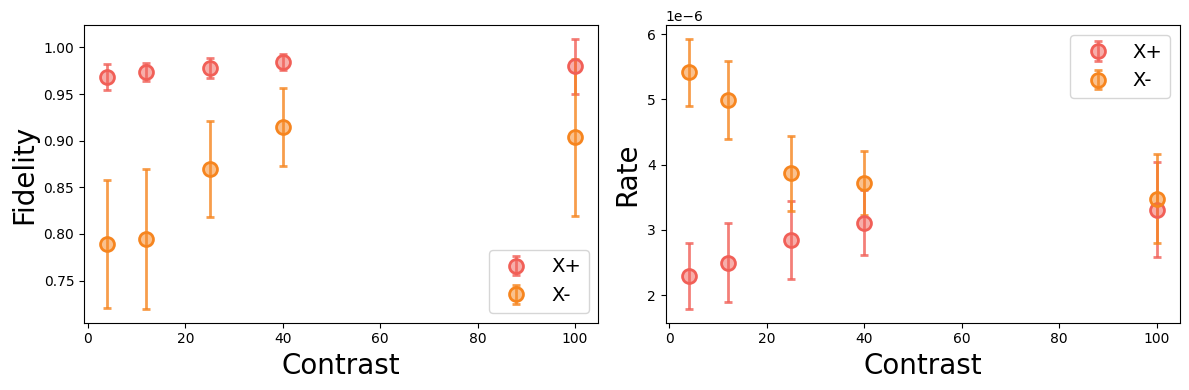

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Sample data
x = contrast_list
y_0 = fid_list_0_c
y_1 = fid_list_1_c

yerr_0 = fid_list_0_err_c
yerr_1 = fid_list_1_err_c


y_r_0 = np.mean(reshaped_brate_apd_1_list, axis = 1)
y_r_1 = np.mean(reshaped_brate_apd_2_list, axis = 1)

yerr_r_0 = np.std(reshaped_brate_apd_1_list, axis = 1)
yerr_r_1 = np.std(reshaped_brate_apd_2_list, axis = 1)

# Define colors with alpha values
facecolor_cl = colors.to_rgba(c1, alpha=0.5)
edgecolor_cl = colors.to_rgba(c1, alpha=1.0)
errorbar_color_cl = colors.to_rgba(c1, alpha=0.8)

facecolor_s = colors.to_rgba(c2, alpha=0.5)
edgecolor_s = colors.to_rgba(c2, alpha=1.0)
errorbar_color_s = colors.to_rgba(c2, alpha=0.8)

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  # 1 row, 2 columns

# Plot in the first subplot
axs[0].errorbar(
    x, y_0, yerr=yerr_0,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_cl,
    markeredgecolor=edgecolor_cl,
    ecolor=errorbar_color_cl,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X+'
)

axs[0].errorbar(
    x, y_1, yerr=yerr_1,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_s,
    markeredgecolor=edgecolor_s,
    ecolor=errorbar_color_s,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X-'
)

# Customize the first subplot
axs[0].set_xlabel('Contrast', fontsize=20)
axs[0].set_ylabel('Fidelity', fontsize=20)
axs[0].legend(fontsize=14)

# Plot in the second subplot (identical to the first one)
axs[1].errorbar(
    x, y_r_0, yerr=yerr_r_0,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_cl,
    markeredgecolor=edgecolor_cl,
    ecolor=errorbar_color_cl,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X+'
)

axs[1].errorbar(
    x, y_r_1, yerr=yerr_r_1,
    fmt='o',
    markersize=10,
    markerfacecolor=facecolor_s,
    markeredgecolor=edgecolor_s,
    ecolor=errorbar_color_s,
    capsize=3,
    elinewidth=2,
    markeredgewidth=2,
    label='X-'
)

# Customize the second subplot
axs[1].set_xlabel('Contrast', fontsize=20)
axs[1].set_ylabel('Rate', fontsize=20)
axs[1].legend(fontsize=14)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()


In [65]:
def elel_bell_state_Ztomography(rho):
    ZpZp = qt.fidelity(rho, qt.tensor(rho_ideal_Zp, rho_ideal_Zp))**2
    ZpZm = qt.fidelity(rho, qt.tensor(rho_ideal_Zp, rho_ideal_Zm))**2
    ZmZp = qt.fidelity(rho, qt.tensor(rho_ideal_Zm, rho_ideal_Zp))**2
    ZmZm = qt.fidelity(rho, qt.tensor(rho_ideal_Zm, rho_ideal_Zm))**2
    
    ZZ = [ZpZp/(ZpZp+ZpZm+ZmZp+ZmZm), ZpZm/(ZpZp+ZpZm+ZmZp+ZmZm), ZmZp/(ZpZp+ZpZm+ZmZp+ZmZm), ZmZm/(ZpZp+ZpZm+ZmZp+ZmZm)]
    return ZZ

def elel_bell_state_Xtomography(rho):
    XpXp = qt.fidelity(rho, qt.tensor(rho_ideal_Xp, rho_ideal_Xp))**2
    XpXm = qt.fidelity(rho, qt.tensor(rho_ideal_Xp, rho_ideal_Xm))**2
    XmXp = qt.fidelity(rho, qt.tensor(rho_ideal_Xm, rho_ideal_Xp))**2
    XmXm = qt.fidelity(rho, qt.tensor(rho_ideal_Xm, rho_ideal_Xm))**2
    XX = [XpXp/(XpXp+XpXm+XmXp+XmXm), XpXm/(XpXp+XpXm+XmXp+XmXm), XmXp/(XpXp+XpXm+XmXp+XmXm), XmXm/(XpXp+XpXm+XmXp+XmXm)]

    return XX

def elel_bell_state_Ytomography(rho):
    YpYp = qt.fidelity(rho, qt.tensor(rho_ideal_Yp, rho_ideal_Yp))**2
    YpYm = qt.fidelity(rho, qt.tensor(rho_ideal_Yp, rho_ideal_Ym))**2
    YmYp = qt.fidelity(rho, qt.tensor(rho_ideal_Ym, rho_ideal_Yp))**2
    YmYm = qt.fidelity(rho, qt.tensor(rho_ideal_Ym, rho_ideal_Ym))**2
    
    YY = [YpYp/(YpYp+YpYm+YmYp+YmYm), YpYm/(YpYp+YpYm+YmYp+YmYm), YmYp/(YpYp+YpYm+YmYp+YmYm), YmYm/(YpYp+YpYm+YmYp+YmYm)]
    return YY

## B16-G12 parallel entanglement

In [ ]:
## Turn into parallel topology
g12_b16_network.parallel_telescope()

In [123]:
# Create parallel network for telescope:
# Setup efficiencies

g12_b16_network.fibercoupling_eff_1 = 1
g12_b16_network.fibercoupling_eff_2 = 1

g12_b16_network.snspd_eff_1 = 1
g12_b16_network.snspd_eff_2 = 1

print('Detection efficiency 1 is = ', g12_b16_network.detection_eff_1)
print('Detection efficiency 2 is = ', g12_b16_network.detection_eff_2)

print('Link 1 efficientvy is = ', g12_b16_network.link_eff_1)
print('Link 2 efficientvy is = ', g12_b16_network.link_eff_2)


Detection efficiency 1 is =  1
Detection efficiency 2 is =  1
Link 1 efficientvy is =  1
Link 2 efficientvy is =  1


In [130]:
imperfections_1 ={'contrast_noise': 0, #(0 not noisy or 1 noisy)
                'contrast': 'perfect', #'real'
                'tdinoise': 0, #np.pi/25, #'real'
                'mw': 'perfect', # or perfect
                'mw_noise': 0, #(0 is stable or 1 noisy/underotates overroates every experimental shot)
                'mw_fid_num': [b16_mwfid, b16_mwfid] # default fidelities
               }
imperfections_2 ={'contrast_noise': 0, #(0 not noisy or 1 noisy)
                'contrast': 'perfect', #'real'
                'tdinoise': 0, #np.pi/25, #'real'
                'mw': 'perfect', # or perfect
                'mw_noise': 0, #(0 is stable or 1 noisy/underotates overroates every experimental shot)
                'mw_fid_num': [g12_mwfid, g12_mwfid] # default fidelities
               }

mu1 = 0.01
mu2 = 0.01

# e1e2
e1_initial = qt.tensor(rho_ideal_Xp)
e2_initial = qt.tensor(rho_ideal_Xp)

In [136]:
rho = parallel_entanglement_ee(e1_initial, e2_initial, imperfections_1, imperfections_2, mu1, mu2, bin = 1)
print(rho)
rho = rho[0]

[Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 1.24999687e-03  3.43800885e-17  4.74807751e-16 -9.65338186e-32]
 [ 8.80897563e-17  4.99375002e-01 -4.98750003e-01 -7.65402336e-20]
 [ 4.98038176e-16 -4.98750003e-01  4.99375002e-01 -7.65402336e-20]
 [-9.60462616e-32 -7.65402336e-20 -7.65402336e-20  1.87469504e-35]], 0.004962643369064957, 0.004962643369064955, 0.01486311695239623, 0.014863116952396232]


In [137]:
fid = qt.fidelity(qt.Qobj(rho, dims=[[2, 2], [2, 2]]), qt.ket2dm(bell_states[3]))
print(fid)


0.9990620624808697


In [ ]:
bin = 1 bell_states[3]
bin = 2 bell_states[3]
bin = 3  #not a bell pair
bin = 4  #not a bell pair



SyntaxError: invalid syntax (642067160.py, line 1)

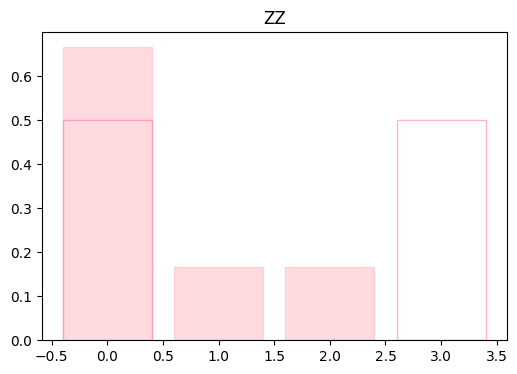

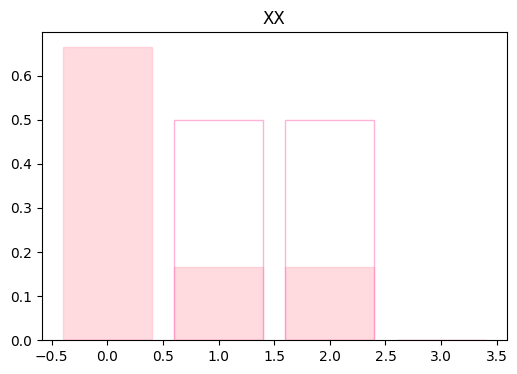

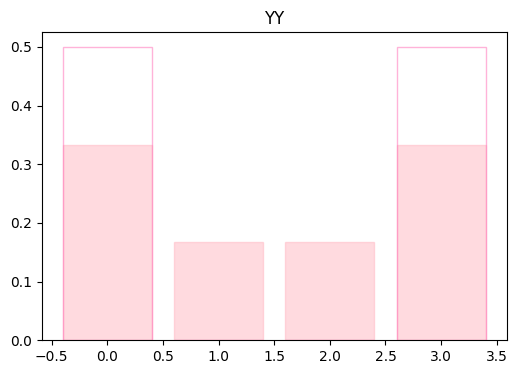

In [ ]:
ZZ_tom = elel_bell_state_Ztomography(rho)
XX_tom = elel_bell_state_Xtomography(rho)
YY_tom = elel_bell_state_Ytomography(rho)

bell_state_barplotZZ(ZZ_tom)
bell_state_barplotXX(XX_tom)
bell_state_barplotYY(YY_tom)

In [ ]:
def parallel_entanglement_ee(e1_initial, e2_initial, imperfections_1, imperfections_2, mu1, mu2, bin = 1):
    """ El-el parallel entanglement """

    if imperfections_1['contrast_noise'] == False:
        wl_1 = sim2.fiber_network.siv1.optimum_freq
        cav_refl_1 = sim2.fiber_network.siv1.cav_refl(wl_1)
            
    elif imperfections_1['contrast_noise'] == True:
        wl_1 = np.random.normal(loc=sim2.fiber_network.siv1.optimum_freq, scale=50)
        cav_refl_1 = sim2.fiber_network.siv1.cav_refl(wl_1)

    if imperfections_2['contrast_noise'] == False:
        wl_2 = sim2.fiber_network.siv2.optimum_freq
        cav_refl_2 = sim2.fiber_network.siv2.cav_refl(wl_2)
            
    elif imperfections_2['contrast_noise'] == True:
        wl_2 = np.random.normal(loc=sim2.fiber_network.siv2.optimum_freq, scale=50)
        cav_refl_2 = sim2.fiber_network.siv2.cav_refl(wl_2)

    
    fidel_values_pi_pi2_1 = {'pi': imperfections_1['mw_fid_num'][0],
                'pi_half': imperfections_1['mw_fid_num'][1]
                }        
    fidel_values_pi_pi2_2 = {'pi': imperfections_2['mw_fid_num'][0],
                'pi_half': imperfections_2['mw_fid_num'][1]
                }        

    # 'real'/'perfect' and 'stable'/'noisy'
    gates1 = set_mw_fidelities(fid = imperfections_1['mw'], noise = imperfections_1['mw_noise'], fidel_val = fidel_values_pi_pi2_1)
    gates2 = set_mw_fidelities(fid = imperfections_2['mw'], noise = imperfections_2['mw_noise'], fidel_val = fidel_values_pi_pi2_2)

    
    siv_beamsplitters1 = siv_beamsplitter(cav_refl_1, imperfections_1['contrast'])
    siv_beamsplitters2 = siv_beamsplitter(cav_refl_2, imperfections_2['contrast'])


    ## photonic qubit node 1
    alpha_1 = np.sqrt(mu1)
    early_time_bin_1 = qt.tensor(qt.coherent(N, alpha_1/np.sqrt(2)), qt.coherent(N, 0))
    late_time_bin_1 = qt.tensor(qt.coherent(N, 0), qt.coherent(N, alpha_1/np.sqrt(2)))
    input_coh_1 = (early_time_bin_1 + late_time_bin_1)
    
    ## photonic qubit node 2
    alpha_2 = np.sqrt(mu2)
    early_time_bin_2 = qt.tensor(qt.coherent(N, alpha_2/np.sqrt(2)), qt.coherent(N, 0))
    late_time_bin_2 = qt.tensor(qt.coherent(N, 0), qt.coherent(N, alpha_2/np.sqrt(2)))
    input_coh_2 = (early_time_bin_2 + late_time_bin_2)

    rho_0_1 = qt.tensor(e1_initial, qt.ket2dm(input_coh_1))
    rho_0_2 = qt.tensor(e2_initial, qt.ket2dm(input_coh_2))

    # print('Initial number of photons per qubit =', (Noperator*rho_0.ptrace([1])).tr(),  (Noperator*rho_0.ptrace([2])).tr())

    ## First Node
    
    # reflect early
    rho_1_1 = siv_beamsplitters1[0]*(qt.tensor(rho_0_1, qt.fock_dm(N, 0)))*siv_beamsplitters1[0].dag()
    rho_2_1 = (siv_beamsplitters1[1]*(qt.tensor(rho_1_1, qt.fock_dm(N, 0)))*siv_beamsplitters1[1].dag()).ptrace([0, 2, 3])

    # do a pi gate on the electron
    pi_oper_1 = qt.tensor(gates1['pi'], IdN, IdN)
    rho_3_1 = pi_oper_1*rho_2_1*pi_oper_1.dag()
    
    # # print('The number of photons mid spin photon =', (Noperator*rho_2.ptrace([1])).tr(), (Noperator*rho_2.ptrace([2])).tr())

    # reflect late
    rho_4_1 = siv_beamsplitters1[0]*(qt.tensor(rho_3_1, qt.fock_dm(N, 0)))*siv_beamsplitters1[0].dag()
    rho_5_1 = (siv_beamsplitters1[1]*(qt.tensor(rho_4_1, qt.fock_dm(N, 0)))*siv_beamsplitters1[1].dag()).ptrace([0, 2, 3])
    
    rho_6_1 = pi_oper_1*rho_5_1*pi_oper_1.dag()

    ## Link loss (add link loss )

    eff_1 = g12_b16_network.link_eff_1
    rho_7_1 = loss_photonqubit_elSpin(rho_6_1, eff_1)

    ## Second Node
    
    # reflect early
    rho_1_2 = siv_beamsplitters2[0]*(qt.tensor(rho_0_2, qt.fock_dm(N, 0)))*siv_beamsplitters2[0].dag()
    rho_2_2 = (siv_beamsplitters2[1]*(qt.tensor(rho_1_2, qt.fock_dm(N, 0)))*siv_beamsplitters2[1].dag()).ptrace([0, 2, 3])

    # do a pi gate on the electron
    pi_oper_2 = qt.tensor(gates2['pi'], IdN, IdN)
    rho_3_2 = pi_oper_2*rho_2_2*pi_oper_2.dag()
    
    # # print('The number of photons mid spin photon =', (Noperator*rho_2.ptrace([1])).tr(), (Noperator*rho_2.ptrace([2])).tr())

    # reflect late
    rho_4_2 = siv_beamsplitters2[0]*(qt.tensor(rho_3_2, qt.fock_dm(N, 0)))*siv_beamsplitters2[0].dag()
    rho_5_2 = (siv_beamsplitters2[1]*(qt.tensor(rho_4_2, qt.fock_dm(N, 0)))*siv_beamsplitters2[1].dag()).ptrace([0, 2, 3])
    
    rho_6_2 = pi_oper_2*rho_5_2*pi_oper_2.dag()

    ## Link loss (add link loss )

    eff_2 = g12_b16_network.link_eff_2
    rho_7_2 = loss_photonqubit_elSpin(rho_6_2, eff_2)
    
    ## Combine the states
    rho_tot = qt.tensor(rho_7_1, rho_7_2)

    ## Measure photon in X basis
    phi = 0
    # pick whether you want to always get a specific measurement result prob = "deterministic" or
    # prob = "probabilistic" which is probilistic output like in the experiment
    rho_15 = phi_photon_measurement_ee_parallel(rho_tot, phi, bin, tdi_noise = imperfections_1['tdinoise'], prob = "deterministic")

    return rho_15

In [ ]:
def phi_photon_measurement_ee_parallel(rho, phi, bin, tdi_noise = imperfections_1['tdinoise'], prob = "prob"):

    # the combine state of el-el and two qubits is el-e-l-el-e-l so we need to redo the raising/lowering operators
    
    # loss
    a_1_4 = qt.tensor(qt.destroy(N), IdN, Id2, IdN, IdN)
    a_2_4 = qt.tensor(IdN, qt.destroy(N), Id2, IdN, IdN)
    a_3_4 = qt.tensor(IdN, IdN, Id2, qt.destroy(N), IdN)
    a_4_4 = qt.tensor(IdN, IdN, Id2, IdN, qt.destroy(N))

    Pj_1000 = qt.composite(Id2, qt.ket2dm(qt.basis(N, 1)), qt.ket2dm(qt.basis(N, 0)), Id2, qt.ket2dm(qt.basis(N, 0)), qt.ket2dm(qt.basis(N, 0)))
    Pj_0100 = qt.composite(Id2, qt.ket2dm(qt.basis(N, 0)), qt.ket2dm(qt.basis(N, 1)), Id2, qt.ket2dm(qt.basis(N, 0)), qt.ket2dm(qt.basis(N, 0)))        
    Pj_0010 = qt.composite(Id2, qt.ket2dm(qt.basis(N, 0)), qt.ket2dm(qt.basis(N, 0)), Id2, qt.ket2dm(qt.basis(N, 1)), qt.ket2dm(qt.basis(N, 0)))
    Pj_0001 = qt.composite(Id2, qt.ket2dm(qt.basis(N, 0)), qt.ket2dm(qt.basis(N, 0)), Id2, qt.ket2dm(qt.basis(N, 0)), qt.ket2dm(qt.basis(N, 1)))        


    ratio = np.random.normal(loc=0.5, scale=0*0.1*0.5)
    # pick which TDI to use 
    # short tdi entangles
    angle = np.random.normal(loc=2*np.pi + tdi_noise, scale=0*0.1*2*np.pi)
    r = np.exp(1j*(angle))*np.sqrt(ratio)
    if np.abs(r) > 1:
        r = 1
    bs_5050_el_r_01 = general_BS(r, np.sqrt(1-(abs(r))**2), a_1_4, a_3_4) # earlies
    bs_5050_el_r_02 = general_BS(r, np.sqrt(1-(abs(r))**2), a_2_4, a_4_4) # lates
    oper_1 = qt.tensor(Id2, bs_5050_el_r_01)
    oper_2 = qt.tensor(Id2, bs_5050_el_r_02)
    ## now the qudit is rotated into the basis we want to measure
    rho1 = oper_1*rho*oper_1.dag()
    rho2 = oper_2*rho1*oper_2.dag()
    
    # probability of each bin firing
    brate_bin_1 = (Pj_1000*rho2*Pj_1000.dag()).tr()
    brate_bin_2 = (Pj_0100*rho2*Pj_0100.dag()).tr()
    brate_bin_3 = (Pj_0010*rho2*Pj_0010.dag()).tr()
    brate_bin_4 = (Pj_0001*rho2*Pj_0001.dag()).tr()
    bnorm_tot_rates = brate_bin_1 + brate_bin_2 + brate_bin_3 + brate_bin_4
    
    # probabilities
    brate_bin_1_norm = brate_bin_1/bnorm_tot_rates
    brate_bin_2_norm = brate_bin_2/bnorm_tot_rates
    brate_bin_3_norm = brate_bin_3/bnorm_tot_rates
    brate_bin_4_norm = brate_bin_4/bnorm_tot_rates

    #Final density matrix of the electron state
    rho_final_bin_1 = ((Pj_1000*rho2*Pj_1000.dag())/brate_bin_1).ptrace([0, 3]) # spin state left over after bin 1 firing
    rho_final_bin_2 = ((Pj_0100*rho2*Pj_0100.dag())/brate_bin_2).ptrace([0, 3]) # spin state left over after bin 2 firing
    rho_final_bin_3 = ((Pj_0010*rho2*Pj_0010.dag())/brate_bin_3).ptrace([0, 3]) # spin state left over after bin 3 firing
    rho_final_bin_4 = ((Pj_0001*rho2*Pj_0001.dag())/brate_bin_4).ptrace([0, 3]) # spin state left over after bin 4 firing

    
    if prob == "deterministic":
        if bin == 1:
            spin_state = rho_final_bin_1
        elif bin == 2:
            spin_state = rho_final_bin_2
        elif bin == 3:
            spin_state = rho_final_bin_3
        elif bin == 4:
            spin_state = rho_final_bin_4 
        output = [spin_state, brate_bin_1, brate_bin_2, brate_bin_3, brate_bin_4]

    elif prob == "probabilistic":
        # probabilistic projective measurement
        quantum_measurement_s1s2 = np.random.choice([1, 2, 3, 4], p=[brate_bin_1_norm, brate_bin_2_norm, brate_bin_3_norm, brate_bin_4_norm])
        if quantum_measurement_s1s2 == 1:
            spin_state = rho_final_bin_1
        elif quantum_measurement_s1s2 == 2:
            spin_state = rho_final_bin_2
        elif quantum_measurement_s1s2 == 3:
            spin_state = rho_final_bin_3
        elif quantum_measurement_s1s2 == 4:
            spin_state = rho_final_bin_4 
        output = [spin_state, brate_bin_1, brate_bin_2, brate_bin_3, brate_bin_4, quantum_measurement_s1s2]
    return output
